In [1]:
# thinking about allowing each waveform their own time grid

# each waveform will have the same number of features, just different
# number of samples so they can be concatenated

In [2]:
import os

In [3]:
import numpy as np

In [4]:
x0 = np.random.uniform(size=(10, 3))
x1 = np.random.uniform(size=(13, 3))

In [5]:
x = np.concatenate((x0,x1))

In [6]:
x.shape

(23, 3)

# grids

In [7]:
import matplotlib.pyplot as plt

In [8]:
# each feature has it's only 1D domain
domain_1d_q = np.linspace(1, 3, 5)

domain_1d_spin1_mag = np.linspace(0, 0.99, 3)
domain_1d_spin1_theta = np.linspace(0, np.pi, 3)
domain_1d_spin1_phi = np.linspace(0, np.pi, 3)

domain_1d_spin2_mag = np.linspace(0, 0.99, 3)
domain_1d_spin2_theta = np.linspace(0, np.pi, 3)
domain_1d_spin2_phi = np.linspace(0, np.pi, 3)

domain_1d_theta = np.linspace(0, np.pi, 3)
domain_1d_phi = np.linspace(0, np.pi, 3)

In [9]:
one_dims = [domain_1d_q, domain_1d_spin1_mag, domain_1d_spin1_theta, domain_1d_spin1_phi, domain_1d_spin2_mag, domain_1d_spin2_theta, domain_1d_spin2_phi, domain_1d_theta, domain_1d_phi]

In [10]:
ndim = len(one_dims)
XYZ = np.meshgrid(*[x0 for x0 in one_dims])
XYZ = [x_.ravel() for x_ in XYZ]

In [11]:
len(XYZ)

9

In [12]:
XYZ[0].shape

(32805,)

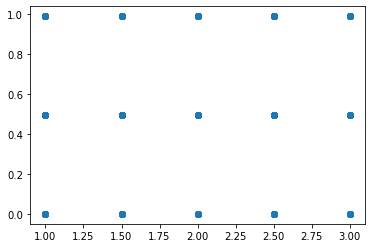

In [13]:
plt.plot(XYZ[0], XYZ[1], 'o')

## random sample

In [14]:
import pycbc.coordinates

In [15]:


# def sample_3d_sphere_uniform(npts):
#     """
    
#     # this one uses 50% isotropic and 50% naive sphere sampling because isotropic doesn't go a good job at sampling small spin magnitudes
    
    
#     generates random x,y,z 3d vector components
#     distributed uniformly (isotropic?) in a 3-sphere.
#     """
    
#     spin_mag = np.random.uniform(0, 1, npts//2)
    
#     # correction to the magnitude of the vector so that
#     # there isn't an over density near the centre.
#     # Don't really understand though.
#     R = 0.99 # this is the maximum magnitude
#     spin_mag = R * np.cbrt( spin_mag )
    
#     spin_phi = np.random.uniform(0, 2*np.pi, npts//2)
#     spin_theta = np.arccos(np.random.uniform(-1, 1, npts//2))
    
    
#     spin_mag_b = np.random.uniform(0, 1, npts//2)
#     spin_phi_b = np.random.uniform(0, 2*np.pi, npts//2)
#     spin_theta_b = np.random.uniform(0, np.pi, npts//2)
    
    
#     # return spin_mag, spin_phi, spin_theta
#     return np.concatenate((spin_mag, spin_mag_b)), np.concatenate((spin_phi, spin_phi_b)), np.concatenate((spin_theta, spin_theta_b))

def sample_3d_sphere_uniform(npts):
    """
    generates random x,y,z 3d vector components
    distributed uniformly (isotropic?) in a 3-sphere.
    """
    
    spin_mag = np.random.uniform(0, 1, npts)
    
    # correction to the magnitude of the vector so that
    # there isn't an over density near the centre.
    # Don't really understand though.
    R = 0.99 # this is the maximum magnitude
    spin_mag = R * np.cbrt( spin_mag )
    
    spin_phi = np.random.uniform(0, 2*np.pi, npts)
    spin_theta = np.arccos(np.random.uniform(-1, 1, npts))
    
    
    return spin_mag, spin_phi, spin_theta

In [ ]:
def draw_9d_samples(npts):
    """
    draw npts samples from the 9D space of
    
    mass-ratio, 3-spins for each black hole
    and 2 angles for the direction of propagation
    """
    
    mass_ratio = np.random.uniform(1, 3, npts)
    
    spin1_mag, spin1_phi, spin1_theta = sample_3d_sphere_uniform(npts)
    
    spin1x, spin1y, spin1z = pycbc.coordinates.spherical_to_cartesian(spin1_mag, spin1_phi, spin1_theta)
    
    spin2_mag, spin2_phi, spin2_theta = sample_3d_sphere_uniform(npts)
    
    spin2x, spin2y, spin2z = pycbc.coordinates.spherical_to_cartesian(spin2_mag, spin2_phi, spin2_theta)
    
    # coa_phase and inclination
    _, phi, theta = sample_3d_sphere_uniform(npts)
    
    return mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, phi, theta

In [ ]:
mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, phi, theta = draw_9d_samples(10000)

NameError: name 'np' is not defined

(array([  20.,   76.,  214.,  415.,  611.,  889., 1233., 1663., 2191.,
        2688.]),
 array([0.01530667, 0.11277322, 0.21023977, 0.30770632, 0.40517288,
        0.50263943, 0.60010598, 0.69757253, 0.79503908, 0.89250564,
        0.98997219]),
 <BarContainer object of 10 artists>)

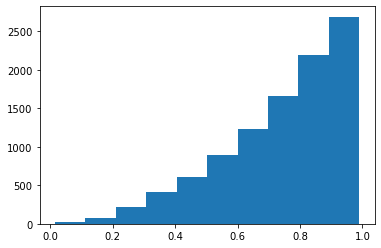

In [18]:
plt.hist(np.linalg.norm([spin1x, spin1y, spin1z], axis=0))

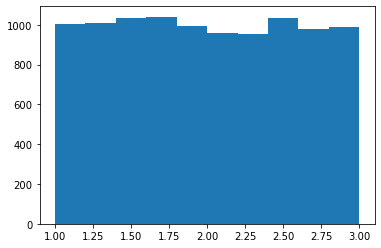

In [19]:
plt.hist(mass_ratio);

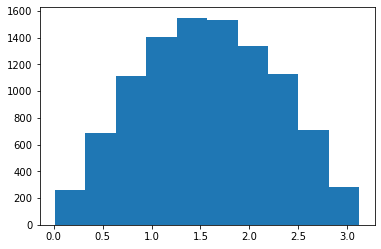

In [20]:
plt.hist(theta);

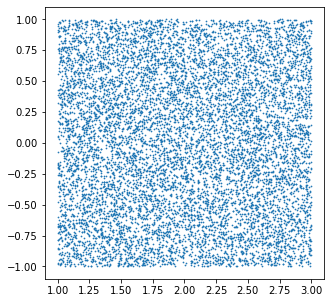

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(mass_ratio, np.cos(theta), s=0.5)

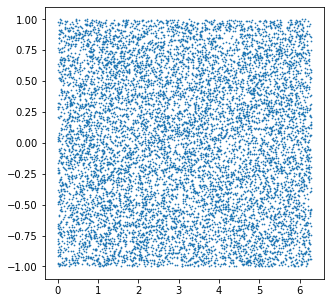

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(phi, np.cos(theta), s=0.5)

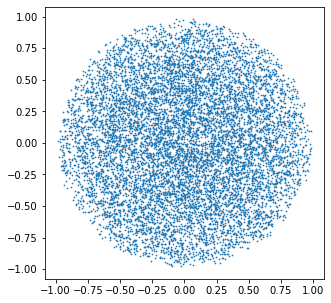

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(spin1x, spin1y, s=0.5)

(array([ 285.,  730., 1126., 1349., 1506., 1477., 1342., 1089.,  771.,
         325.]),
 array([-0.97783006, -0.78172891, -0.58562776, -0.3895266 , -0.19342545,
         0.0026757 ,  0.19877686,  0.39487801,  0.59097916,  0.78708032,
         0.98318147]),
 [<matplotlib.patches.Polygon at 0x11ff8b550>])

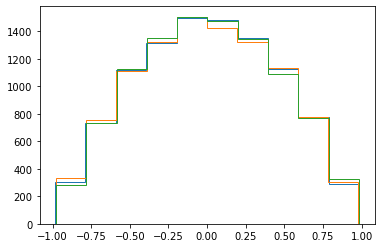

In [24]:
plt.hist(spin1x, histtype='step')
plt.hist(spin1y, histtype='step')
plt.hist(spin1z, histtype='step')

In [1]:
def draw_inc_coa_phase_samples(npts, mass_ratio=1, spin1_mag=0, spin1_phi=0, spin1_theta=0, spin2_mag=0, spin2_phi=0, spin2_theta=0):
    """
    draw npts samples from the inc-coa_phase with other parameters fixed
    """
    
    mass_ratio = np.array([mass_ratio]*npts)
    
    spin1_mag = np.array([spin1_mag]*npts)
    spin1_phi = np.array([spin1_phi]*npts)
    spin1_theta = np.array([spin1_theta]*npts)
    
    spin2_mag = np.array([spin2_mag]*npts)
    spin2_phi = np.array([spin2_phi]*npts)
    spin2_theta = np.array([spin2_theta]*npts)
    
    
    spin1x, spin1y, spin1z = pycbc.coordinates.spherical_to_cartesian(spin1_mag, spin1_phi, spin1_theta)
    
    spin2x, spin2y, spin2z = pycbc.coordinates.spherical_to_cartesian(spin2_mag, spin2_phi, spin2_theta)
    
    # coa_phase and inclination
    _, coa_phase, inclination = sample_3d_sphere_uniform(npts)
    
    return mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination

In [26]:
def draw_spin1_mag_samples(npts, mass_ratio=1, spin1_phi=0, spin1_theta=0, spin2_mag=0, spin2_phi=0, spin2_theta=0, inclination=0, coa_phase=0):
    """
    draw npts samples from the inc-coa_phase with other parameters fixed
    """
    
    mass_ratio = np.array([mass_ratio]*npts)

    spin1_theta = np.array([spin1_theta]*npts)
    
    spin2_mag = np.array([spin2_mag]*npts)
    spin2_phi = np.array([spin2_phi]*npts)
    spin2_theta = np.array([spin2_theta]*npts)
    
    coa_phase = np.array([coa_phase]*npts)
    inclination = np.array([inclination]*npts)

    
    # spin1_mag, _, _ = sample_3d_sphere_uniform(npts)
    spin1_mag = np.random.uniform(0, 0.99, npts)
    spin1_phi = np.array([spin1_phi]*npts)
    spin1x, spin1y, spin1z = pycbc.coordinates.spherical_to_cartesian(spin1_mag, spin1_phi, spin1_theta)
    
    spin2x, spin2y, spin2z = pycbc.coordinates.spherical_to_cartesian(spin2_mag, spin2_phi, spin2_theta)
    
    return mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination

In [27]:
def draw_spin1_mag_spin1_theta_samples(npts, mass_ratio=1, spin1_phi=0, spin2_mag=0, spin2_phi=0, spin2_theta=0, inclination=0, coa_phase=0):
    """
    draw npts samples from the inc-coa_phase with other parameters fixed
    """
    
    mass_ratio = np.array([mass_ratio]*npts)
        
    spin2_mag = np.array([spin2_mag]*npts)
    spin2_phi = np.array([spin2_phi]*npts)
    spin2_theta = np.array([spin2_theta]*npts)
    
    coa_phase = np.array([coa_phase]*npts)
    inclination = np.array([inclination]*npts)

    
    spin1_mag, _, spin1_theta = sample_3d_sphere_uniform(npts)
    spin1_phi = np.array([spin1_phi]*npts)
    spin1x, spin1y, spin1z = pycbc.coordinates.spherical_to_cartesian(spin1_mag, spin1_phi, spin1_theta)
    
    spin2x, spin2y, spin2z = pycbc.coordinates.spherical_to_cartesian(spin2_mag, spin2_phi, spin2_theta)
    
    return mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination

In [28]:
def draw_mass_ratio_spin1_mag_spin1_theta_samples(npts, spin1_phi=0, spin2_mag=0, spin2_phi=0, spin2_theta=0, inclination=0, coa_phase=0):
    """
    draw npts samples from the inc-coa_phase with other parameters fixed
    """
    
    mass_ratio = np.random.uniform(1, 3, npts)
        
    spin2_mag = np.array([spin2_mag]*npts)
    spin2_phi = np.array([spin2_phi]*npts)
    spin2_theta = np.array([spin2_theta]*npts)
    
    coa_phase = np.array([coa_phase]*npts)
    inclination = np.array([inclination]*npts)

    
    spin1_mag, _, spin1_theta = sample_3d_sphere_uniform(npts)
    spin1_phi = np.array([spin1_phi]*npts)
    spin1x, spin1y, spin1z = pycbc.coordinates.spherical_to_cartesian(spin1_mag, spin1_phi, spin1_theta)
    
    spin2x, spin2y, spin2z = pycbc.coordinates.spherical_to_cartesian(spin2_mag, spin2_phi, spin2_theta)
    
    return mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination

In [29]:
def draw_mass_ratio_samples(npts, spin1_mag=0, spin1_phi=0, spin1_theta=0, spin2_mag=0, spin2_phi=0, spin2_theta=0, inclination=0, coa_phase=0):
    """
    draw npts samples from the inc-coa_phase with other parameters fixed
    """
    
    mass_ratio = np.random.uniform(1, 3, npts)

    spin1_mag = np.array([spin1_mag]*npts)
    spin1_phi = np.array([spin1_phi]*npts)
    spin1_theta = np.array([spin1_theta]*npts)
    
    spin2_mag = np.array([spin2_mag]*npts)
    spin2_phi = np.array([spin2_phi]*npts)
    spin2_theta = np.array([spin2_theta]*npts)
    
    coa_phase = np.array([coa_phase]*npts)
    inclination = np.array([inclination]*npts)

    spin1x, spin1y, spin1z = pycbc.coordinates.spherical_to_cartesian(spin1_mag, spin1_phi, spin1_theta)
    spin2x, spin2y, spin2z = pycbc.coordinates.spherical_to_cartesian(spin2_mag, spin2_phi, spin2_theta)
    
    return mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination

# generate waveform

In [30]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})

import numpy as np

import sklearn.preprocessing
import sklearn.model_selection

import pycbc.types
import pycbc.waveform
import pycbc.pnutils
import pycbc.conversions

import lal
import lalsimulation as lalsim
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [31]:
import tensorflow as tf
import wispy.callbacks
import tensorflow_addons as tfa

In [32]:
from tf_fourier_features import FourierFeatureProjection

In [33]:
import pycbc.coordinates

In [34]:
def StoM(S, Mtot):
    """StoM(S, Mtot)
    """
    return S / (lal.MTSUN_SI*Mtot)

def MtoS(M, Mtot):
    """MtoS(Hz, Mtot)
    """
    return M * (lal.MTSUN_SI*Mtot)

def td_amp_scale(mtot, distance):
    """
    mtot in solar masses
    distance in m
    M*G/c^2 * M_sun / dist
    """
    return mtot * lal.MRSUN_SI / distance



def MftoHz(Mf, M):
    """MftoHz(Mf, M)
    """
    return Mf / (lal.MTSUN_SI*M)

def HztoMf(Hz, M):
    """HztoMf(Hz, M)
    """
    return Hz * (lal.MTSUN_SI*M)

In [35]:
def generate_waveform(
    new_times_M,
    time_idxs=None, # indicies at which to return the data on
    mass_ratio=1,
    total_mass=100,
    spin1x=0,
    spin1y=0,
    spin1z=0,
    spin2x=0,
    spin2y=0,
    spin2z=0,
    inclination=0,
    coa_phase=0,
    approximant="SEOBNRv4_opt",
    distance_mpc=1):
    
    mass1=pycbc.conversions.mass1_from_mtotal_q(total_mass, mass_ratio)
    mass2=pycbc.conversions.mass2_from_mtotal_q(total_mass, mass_ratio)
    
    # https://github.com/gwastro/pycbc/blob/master/pycbc/coordinates.py#L117
    # spin1x, spin1y, spin1z = pycbc.coordinates.spherical_to_cartesian(r_1, phi_1, theta_1)

    # mass1=pycbc.conversions.mass1_from_mtotal_q(100, 4)
    # mass2=pycbc.conversions.mass2_from_mtotal_q(100, 4)

    # can scale amp by eta
    # eta = pycbc.conversions.eta_from_mass1_mass2(mass1, mass2)

    params = dict(
        # spin1x=mass_ratio,
        mass1=mass1,
        mass2=mass2,
        spin1x=spin1x,
        spin1y=spin1y,
        spin1z=spin1z,
        spin2x=spin2x,
        spin2y=spin2y,
        spin2z=spin2z,
        approximant=approximant,
        f_lower=10,
        delta_t=1/4096,
        distance=distance_mpc,
        inclination=inclination,
        coa_phase=coa_phase,
        )
    hp, hc = pycbc.waveform.get_td_waveform(**params)
    delta_t = hp.delta_t

    amp = pycbc.waveform.utils.amplitude_from_polarizations(hp, hc).numpy()
    phase = pycbc.waveform.utils.phase_from_polarizations(hp, hc, remove_start_phase=True).numpy()

    times_M = StoM(hp.sample_times.numpy(), total_mass)

    new_amp = IUS(times_M, amp)(new_times_M)

    distance_m = 1e6*distance_mpc*lal.PC_SI
    new_amp /= td_amp_scale(total_mass, distance_m)

    new_phase = IUS(times_M, phase)(new_times_M)
    new_phase += -new_phase[0]

    h = new_amp * np.exp(-1.j * new_phase)
    hp = np.real(h)
    # hc = np.imag(h)
    
    if time_idxs is not None:
        hp = hp[time_idxs]
        
    return hp
    # return hc
    # return new_amp
    # return new_phase

In [36]:
# uniform spacing throughout
t1 = -2000
t2 = 70
dt = 0.5
new_times_M = np.arange(t1, t2, dt)

In [37]:
new_times_M.shape

(4140,)

In [38]:
t_idxs = np.arange(len(new_times_M))
t_training_idxs = t_idxs[::2]
t_validation_idxs = t_idxs[1::2]

In [39]:
t_training_idxs.shape

(2070,)

In [40]:
t_validation_idxs.shape

(2070,)

(-10.0, 10.0)

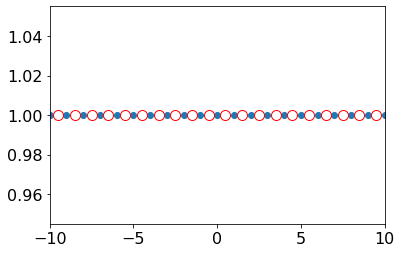

In [41]:
plt.plot(new_times_M[t_training_idxs], np.ones_like(new_times_M[t_training_idxs]), 'o')
plt.plot(new_times_M[t_validation_idxs], np.ones_like(new_times_M[t_validation_idxs]), 'o', mfc='none', c='r', markersize=10)
plt.xlim(-10, 10)

In [42]:
# workflow
# 1. generate seed dataset and compute scalers for X and y

# 2. generate 1st validation dataset

# 3. fit to convergence on dataset

# 4. evaluate model on validation dataset and add the worst performing cases if error on validation below tol then stop and test on test dataset.

# 5. generate 2nd validation dataset

# go to step 3.


# to test this I should start with a smaller parameter space including precessing spins
# maybe... vary spin1 mag and spin1 polar angle and keep everything else fixed
# so then its a 3D model of time, spin1_mag and spin1_polar

In [43]:
%%time
n_samples = 100
# mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination = draw_9d_samples(n_samples)

# mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination = draw_inc_coa_phase_samples(n_samples, mass_ratio=4, spin1_mag=0.99, spin1_phi=0, spin1_theta=np.pi/2, spin2_mag=0, spin2_phi=0, spin2_theta=0)

# mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination = draw_spin1_mag_spin1_theta_samples(n_samples, mass_ratio=4, spin1_phi=0, spin2_mag=0, spin2_phi=0, spin2_theta=0, inclination=0, coa_phase=0)


mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination = draw_mass_ratio_samples(n_samples, spin1_mag=0, spin1_phi=0, spin1_theta=0, spin2_mag=0, spin2_phi=0, spin2_theta=0, inclination=0, coa_phase=0)





CPU times: user 152 µs, sys: 85 µs, total: 237 µs
Wall time: 146 µs


(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

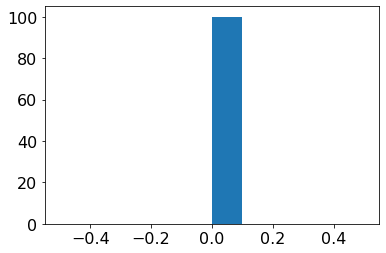

In [44]:
plt.hist(np.linalg.norm([spin1x, spin1z], axis=0))

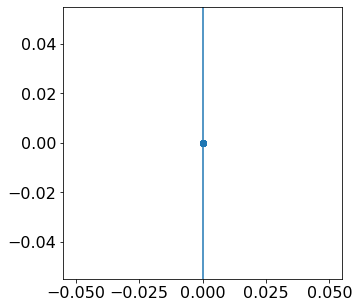

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(spin1x, spin1z)
plt.axvline(0)

In [46]:
%%time
params = dict(
    new_times_M=new_times_M,
    time_idxs=t_training_idxs,
    total_mass=100,
    approximant="SEOBNRv4P",
    distance_mpc=1
)

hps=[]
# for i in range(n_samples):
for i in range(1):
    
    # params.update(
    #     dict(
    #         mass_ratio=mass_ratio[i],
    #         spin1x=spin1x[i],
    #         spin1y=spin1y[i],
    #         spin1z=spin1z[i],
    #         spin2x=spin2x[i],
    #         spin2y=spin2y[i],
    #         spin2z=spin2z[i],
    #         inclination=inclination[i],
    #         coa_phase=coa_phase[i]
    #     )
    # )
    params.update(
        dict(
            mass_ratio=10,
            spin1x=0.98651,
            spin1y=0,
            spin1z=-0.06713,
            spin2x=0,
            spin2y=0,
            spin2z=0,
            inclination=0,
            coa_phase=0,
        )
    )
    
    hp = generate_waveform(**params)
    hps.append(hp)

CPU times: user 1.43 s, sys: 73.4 ms, total: 1.5 s
Wall time: 1.21 s


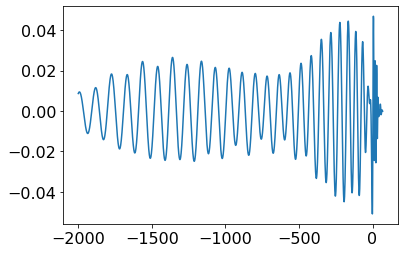

In [47]:
for hp in hps:
    plt.plot(new_times_M[t_training_idxs], hp)
    
# plt.xlim(-100, 100)

(-100.0, 100.0)

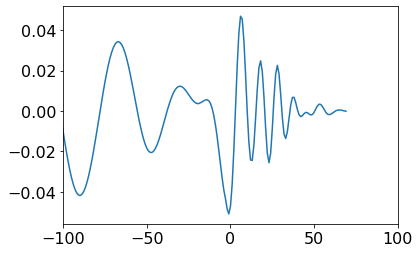

In [48]:
for hp in hps:
    plt.plot(new_times_M[t_training_idxs], hp)
    
plt.xlim(-100, 100)

In [49]:
def generate_dataset(n_samples, new_times_M, time_idxs):
    # mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination = draw_9d_samples(n_samples)
    # mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination = draw_inc_coa_phase_samples(n_samples, mass_ratio=4, spin1_mag=0.99, spin1_phi=0, spin1_theta=np.pi/2, spin2_mag=0, spin2_phi=0, spin2_theta=0)
    # mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination = draw_spin1_mag_spin1_theta_samples(n_samples, mass_ratio=3, spin1_phi=0, spin2_mag=0, spin2_phi=0, spin2_theta=0, inclination=0, coa_phase=0)
    mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination = draw_mass_ratio_spin1_mag_spin1_theta_samples(n_samples, spin1_phi=0, spin2_mag=0, spin2_phi=0, spin2_theta=0, inclination=0, coa_phase=0)
    # mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination = draw_mass_ratio_samples(n_samples, spin1_mag=0.99, spin1_theta=np.pi/2)
    
    
    # mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination = draw_spin1_mag_samples(n_samples, mass_ratio=3, spin1_phi=0, spin1_theta=np.pi/2, spin2_mag=0, spin2_phi=0, spin2_theta=0, inclination=0, coa_phase=0)

    params = dict(
        new_times_M=new_times_M,
        time_idxs=time_idxs,
        total_mass=100,
        approximant="IMRPhenomXP",
        distance_mpc=1
    )

    hps=[]
    for i in range(n_samples):
        
        params.update(
            dict(
                mass_ratio=mass_ratio[i],
                spin1x=spin1x[i],
                spin1y=spin1y[i],
                spin1z=spin1z[i],
                spin2x=spin2x[i],
                spin2y=spin2y[i],
                spin2z=spin2z[i],
                inclination=inclination[i],
                coa_phase=coa_phase[i]
            )
        )

        hp = generate_waveform(**params)
        hps.append(hp)
        
    # X = np.column_stack((mass_ratio, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, coa_phase, inclination))
    X = np.column_stack((mass_ratio, spin1x, spin1y, spin1z))
    return np.row_stack(hps), X, new_times_M[time_idxs][:,np.newaxis]

In [50]:
# uniform spacing throughout
t1 = -2000
# t1 = -500
# t1 = -200
# t1 = -50
t2 = 70
dt = 0.25
new_times_M = np.arange(t1, t2, dt)

In [51]:
new_times_M.shape

(8280,)

In [52]:
n_samples_train=10000
n_samples_val=100

In [53]:
t_idxs = np.arange(len(new_times_M))
t_training_idxs = t_idxs[::2]
t_validation_idxs = t_idxs[1::2]

In [54]:
%%time
y_train, theta_train, times_train = generate_dataset(n_samples_train, new_times_M, t_training_idxs)

CPU times: user 6min 3s, sys: 3min 12s, total: 9min 15s
Wall time: 2min 1s


In [55]:
t_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-0.5, 0.5))
theta_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-0.5, 0.5))

times_train_scaled = t_scaler.fit_transform(times_train)
theta_train_scaled = theta_scaler.fit_transform(theta_train)

In [56]:
y_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-0.5, 0.5))

y_train_shape = y_train.shape
y_train_scaled_flat = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_train_scaled = y_train_scaled_flat.reshape(y_train_shape)

In [57]:
%%time
y_val, theta_val, times_val = generate_dataset(n_samples_val, new_times_M, t_validation_idxs)

CPU times: user 4.08 s, sys: 2.55 s, total: 6.63 s
Wall time: 1.34 s


In [58]:
times_val_scaled = t_scaler.transform(times_val)
theta_val_scaled = theta_scaler.transform(theta_val)

y_val_shape = y_val.shape
y_val_scaled_flat = y_scaler.transform(y_val.reshape(-1, 1))
y_val_scaled = y_val_scaled_flat.reshape(y_val_shape)

In [59]:
y_train_scaled_flat.shape

(41400000, 1)

In [60]:
y_val_scaled_flat.shape

(414000, 1)

In [61]:
theta_train.shape

(10000, 4)

In [62]:
y_train.shape

(10000, 4140)

In [63]:
times_train.shape

(4140, 1)

In [64]:
y_train_scaled.shape

(10000, 4140)

In [65]:
y_val_scaled.shape

(100, 4140)

In [66]:
theta_train_scaled.shape

(10000, 4)

In [67]:
times_train_scaled.shape

(4140, 1)

In [68]:
theta_train[:,1].argmax()

442

In [69]:
theta_train[:,1].max()

0.9880706375607483

In [70]:
theta_train[theta_train[:,1].argmax()]

array([ 1.52400433,  0.98807064,  0.        , -0.0426194 ])

In [71]:
np.linalg.norm(theta_train[theta_train[:,1].argmax(),1:4])

0.9889893823408598

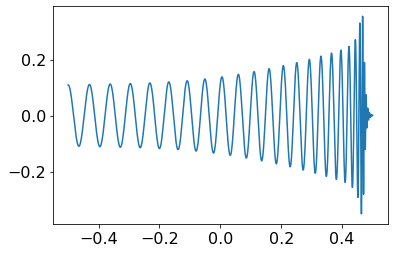

In [72]:
plt.plot(times_train_scaled, y_train_scaled[theta_train[:,1].argmax()])

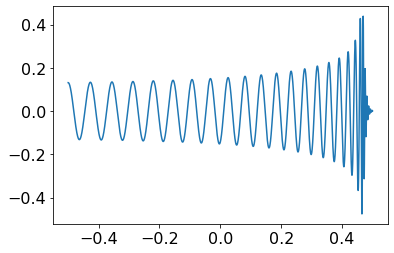

In [73]:
plt.plot(times_train_scaled, y_train_scaled[0])

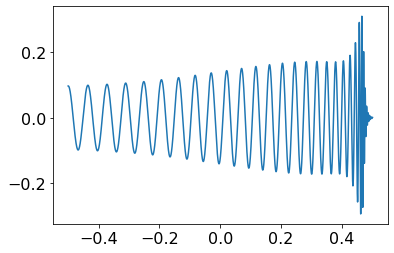

In [74]:
plt.plot(times_val_scaled, y_val_scaled[0])

In [75]:
def build_input_single_q(t, *args):
    """
    t is a matrix i.e. shape = (-1, 1)
    list of parameters
    """
    theta = np.array([*args])
    theta = np.ones_like(t) * theta

    return np.column_stack((t, theta))

In [76]:
build_input_single_q(np.arange(0, 1, 0.1)[:,np.newaxis], [1,2,3])

array([[0. , 1. , 2. , 3. ],
       [0.1, 1. , 2. , 3. ],
       [0.2, 1. , 2. , 3. ],
       [0.3, 1. , 2. , 3. ],
       [0.4, 1. , 2. , 3. ],
       [0.5, 1. , 2. , 3. ],
       [0.6, 1. , 2. , 3. ],
       [0.7, 1. , 2. , 3. ],
       [0.8, 1. , 2. , 3. ],
       [0.9, 1. , 2. , 3. ]])

In [77]:
def build_input_multiple_q(t, thetas):
    """
    t is a vector
    thetas is a vector
    """
    return np.row_stack([build_input_single_q(t, *theta) for theta in thetas])

In [78]:
theta_train_scaled.shape

(10000, 4)

In [79]:
# X_train = build_input_multiple_q(times_train_scaled, theta_train_scaled)
X_train = build_input_multiple_q(times_train, theta_train)

In [80]:
X_train.shape

(41400000, 5)

In [81]:
X_train[0]

array([-2.00000000e+03,  1.23292696e+00,  5.99431217e-01,  0.00000000e+00,
       -3.94347156e-01])

In [82]:
# X_val = build_input_multiple_q(times_val_scaled, theta_val_scaled)
X_val = build_input_multiple_q(times_val, theta_val)

In [83]:
X_val.shape

(414000, 5)

In [84]:
# fig = plt.figure(dpi=120)
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X_train[:,0], X_train[:,2], y_train_scaled, s=3)
# ax.scatter(X_val[:,0], X_val[:,2], y_val_scaled, s=1)

In [85]:
# fig = plt.figure(dpi=120)
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X_train[:,0], X_train[:,4], y_train_scaled, s=1)
# ax.scatter(X_val[:,0], X_val[:,4], y_val_scaled, s=2)

In [86]:
# def run_model(X_train, y_train, epochs=1001, threshold=1e-7, batch_size=32, validation_data=None, learning_rate=1e-3, verbose=0, model_version="1"):
#     activation = 'relu'
#     units = 256
#     n_layers = 3
#     gaussian_projection = 16
#     # gaussian_scale = 5*6 # -2000    
#     gaussian_scale = 5*6/4 # -500

#     # model 1: only pass the time through the RFF encoding
#     time_input = tf.keras.Input(shape=(1,), name='time_input')
#     # q_input = tf.keras.Input(shape=(1,), name='q_input')
#     # theta_input = tf.keras.Input(shape=(2,), name='theta_input')
#     theta_input = tf.keras.Input(shape=(4,), name='theta_input')
#     x_t = FourierFeatureProjection(gaussian_projection = gaussian_projection, gaussian_scale = gaussian_scale)(time_input)
    
    
#     if model_version == "1":
#         # x = tf.keras.layers.Concatenate()([x_t, q_input])
#         x = tf.keras.layers.Concatenate()([x_t, theta_input])
#     elif model_version == "2":
#         # x_q = FourierFeatureProjection(gaussian_projection = 5, gaussian_scale = 0.1)(q_input)
#         # x_theta = FourierFeatureProjection(gaussian_projection = 16, gaussian_scale = 0.3)(theta_input)
#         x_theta = FourierFeatureProjection(gaussian_projection = 16, gaussian_scale = 2)(theta_input)
#         # x = tf.keras.layers.Concatenate()([x_t, x_q])
#         x = tf.keras.layers.Concatenate()([x_t, x_theta])
#     else:
#         raise ValueError()
    
#     # x_q = tf.keras.layers.Dense(units, activation)(q_input)

#     for i in range(n_layers):
#         x = tf.keras.layers.Dense(units, activation)(x)
#     x = tf.keras.layers.Dense(1)(x)
#     model = tf.keras.Model(inputs=[time_input, theta_input], outputs=x)


    
#     callbacks = [
#         # tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
#         wispy.callbacks.ThresholdCallback(threshold),
#         # tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-6, patience=200, factor=0.9, monitor='val_loss'),
#         # tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-6, patience=200, factor=0.6, monitor='val_loss'),
        
#         # tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-6, patience=80, factor=0.2, monitor='val_loss'),
#         tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-6, patience=10, factor=0.2, monitor='val_loss'),
        
        
#         # tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-6, patience=200, factor=0.1, monitor='val_loss'),
#         # tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=300),
#         tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
#     ]
    
#     model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate))

#     history = model.fit(x=[X_train[:,0], X_train[:,1:]], y=y_train, epochs=epochs, verbose=verbose, batch_size=batch_size, callbacks=callbacks, validation_data=validation_data)
    
#     return history, model

In [87]:
# https://stackoverflow.com/a/71990796

TRAINING_POISON_PILL_FILE_NAME = 'stop-training'

class PoisonPillCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if os.path.exists(TRAINING_POISON_PILL_FILE_NAME):
            self.model.stop_training = True
            os.remove(TRAINING_POISON_PILL_FILE_NAME)
            print(f'poison pill file "{TRAINING_POISON_PILL_FILE_NAME}" detected, stopping training')

In [88]:
def run_model(X_train, y_train, time_b_scale, theta_b_scale, epochs=1001, threshold=1e-7, batch_size=32, validation_data=None, verbose=0):
    activation = 'relu'
    fan_in=128
    units = 256
    n_layers = 3
    
    
    # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/CosineDecayRestarts1
    lrs = tf.keras.optimizers.schedules.CosineDecayRestarts(
        1e-3,
        # 1000,
        5,
        t_mul=2.0,
        m_mul=1.0,
        alpha=0.0,
        name=None
    )
    
    # https://www.tensorflow.org/addons/tutorials/optimizers_cyclicallearningrate
    # epochs=104
    # batch_size=32
    steps_per_epoch = len(X_train) // batch_size
    print(steps_per_epoch)
    step = np.arange(0, epochs * steps_per_epoch)
    lr_ = lrs(step)
    
    plt.figure()
    plt.plot(step/steps_per_epoch, lr_)
    plt.xlabel("epoch")
    plt.title("learning rate schedule")
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
    plt.close()
    
    time_kernel_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=time_b_scale)
    time_bias_initializer = tf.keras.initializers.RandomUniform(minval=-1., maxval=1.)
    
    theta_kernel_initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=theta_b_scale)
    theta_bias_initializer = tf.keras.initializers.RandomUniform(minval=-1., maxval=1.)
    
    time_input = tf.keras.Input(shape=(1,), name='time_input')
    theta_input = tf.keras.Input(shape=(4,), name='theta_input')
    
    x_time = tf.keras.layers.Dense(fan_in, kernel_initializer=time_kernel_initializer, bias_initializer=time_bias_initializer, trainable=False)(time_input)
    x_time = tf.keras.layers.Lambda(lambda x: tf.math.sin(np.pi*x))(x_time)
    
    x_theta = tf.keras.layers.Dense(fan_in, kernel_initializer=theta_kernel_initializer, bias_initializer=theta_bias_initializer, trainable=False)(theta_input)
    x_theta = tf.keras.layers.Lambda(lambda x: tf.math.sin(np.pi*x))(x_theta)
    # x_theta = tf.keras.layers.Dense(fan_in, activation='relu')(theta_input)
    
    x = tf.keras.layers.Concatenate()([x_time, x_theta])
    
    for i in range(n_layers):
        x = tf.keras.layers.Dense(units, activation)(x)
    x = tf.keras.layers.Dense(1)(x)
    model = tf.keras.Model(inputs=[time_input, theta_input], outputs=x)
    
    print(model.summary())
    
    # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
    checkpoint_filepath = './checkpoint_dir/checkpoint'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        save_best_only=True)

    
    
    
    
    
    callbacks = [
        # tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
        wispy.callbacks.ThresholdCallback(threshold),
        model_checkpoint_callback,
        PoisonPillCallback(),
        # tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-6, patience=200, factor=0.9, monitor='val_loss'),
        # tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-6, patience=200, factor=0.6, monitor='val_loss'),
        
        # tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-6, patience=80, factor=0.2, monitor='val_loss'),
        # tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-6, patience=10, factor=0.2, monitor='val_loss'),
        
        
        # tf.keras.callbacks.ReduceLROnPlateau(min_lr=1e-6, patience=200, factor=0.1, monitor='val_loss'),
        # tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=300),
        # tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
    ]
    
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lrs))

    history = model.fit(x=[X_train[:,0], X_train[:,1:]], y=y_train, epochs=epochs, verbose=verbose, batch_size=batch_size, callbacks=callbacks, validation_data=validation_data)
    
    # The model weights (that are considered the best) are loaded into the model.
    print("loading best weights from checkpoint")
    model.load_weights(checkpoint_filepath)

    return history, model


In [89]:
# epochs=2000
# epochs=200
# epochs=300
# epochs=100
epochs=65
# batch_size = 512
batch_size = 1024
# batch_size = 2048
print(batch_size)

# learning_rate = 1e-3
# learning_rate = 1e-4
# print(learning_rate)

1024


In [90]:
X_train.shape

(41400000, 5)

In [91]:
X_val.shape

(414000, 5)

In [92]:
pycbc.conversions.mass1_from_mtotal_q(100, 3)

75.0

In [93]:
pycbc.conversions.mass2_from_mtotal_q(100, 3)

25.0

In [94]:
f_rd_mf = HztoMf(pycbc.pnutils._get_final_freq(approx=lalsim.SEOBNRv4, m1=75, m2=25, s1z=0.99, s2z=0.99), 100)
f_rd_mf

0.1367675815410475

40429
Metal device set to: Apple M1 Pro


2022-06-30 20:08:37.879729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-30 20:08:37.880055: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


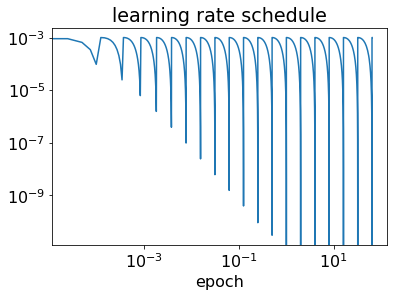

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 theta_input (InputLayer)       [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          256         ['time_input[0][0]']             
                                                                                                  
 dense_1 (Dense)                (None, 128)          640         ['theta_input[0][0]']            
                                                                                              

2022-06-30 20:08:39.650744: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-30 20:08:39.963378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40430/40430 [==============================] - ETA: 0s - loss: 7.4604e-04

2022-06-30 20:14:26.176837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40430/40430 [==============================] - 348s 9ms/step - loss: 7.4604e-04 - val_loss: 2.0148e-05
Epoch 2/65
40430/40430 [==============================] - 343s 8ms/step - loss: 4.7811e-05 - val_loss: 1.1823e-05
Epoch 3/65
40430/40430 [==============================] - 348s 9ms/step - loss: 4.9310e-05 - val_loss: 2.6498e-05
Epoch 4/65
40430/40430 [==============================] - 347s 9ms/step - loss: 1.2589e-05 - val_loss: 8.1794e-06
Epoch 5/65
40430/40430 [==============================] - 343s 8ms/step - loss: 4.2993e-05 - val_loss: 3.2645e-05
Epoch 6/65
40430/40430 [==============================] - 340s 8ms/step - loss: 2.5536e-05 - val_loss: 1.6496e-05
Epoch 7/65
40430/40430 [==============================] - 337s 8ms/step - loss: 1.2042e-05 - val_loss: 8.7316e-06
Epoch 8/65
40430/40430 [==============================] - 338s 8ms/step - loss: 6.5917e-06 - val_loss: 6.4153e-06
Epoch 9/65
40430/40430 [==============================] - 337s 8ms/step - loss: 3.2895e-05 - val_lo

In [95]:
%%time
history, model = run_model(
    X_train,
    y_train_scaled_flat,
    time_b_scale=f_rd_mf,
    theta_b_scale=2,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=([X_val[:,0], X_val[:,1:]], y_val_scaled_flat),
    threshold=1e-7,
    verbose=1,
    )

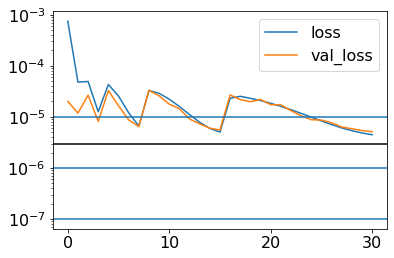

In [96]:
plt.figure()
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.legend()
plt.axhline(1e-5)
plt.axhline(1e-6)
plt.axhline(3e-6, c='k')
plt.axhline(1e-7)
plt.yscale("log")


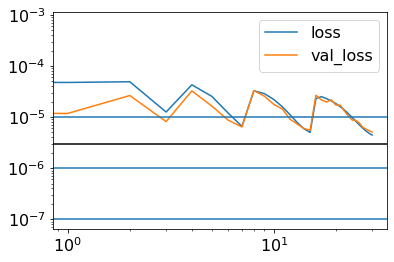

In [97]:
plt.figure()
plt.plot(history.history["loss"], label='loss')
plt.plot(history.history["val_loss"], label='val_loss')
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.axhline(1e-5)
plt.axhline(1e-6)
plt.axhline(3e-6, c='k')
plt.axhline(1e-7)

In [98]:
try:
    plt.figure()
    plt.plot(history.history["lr"], label='lr')
    plt.legend()
    plt.yscale("log")
    # plt.xscale("log")
except:
    pass

<Figure size 432x288 with 0 Axes>

In [99]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 theta_input (InputLayer)       [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          256         ['time_input[0][0]']             
                                                                                                  
 dense_1 (Dense)                (None, 128)          640         ['theta_input[0][0]']            
                                                                                              

In [100]:
# test_input = build_input_single_q(times_train_scaled, *theta_val_scaled[-1])
test_input = build_input_single_q(times_train, *theta_val[-1])
# test_yhat = model.predict([test_input[:,0], test_input[:,1:]], verbose=0)
test_yhat = model([test_input[:,0], test_input[:,1:]])

In [101]:
test_input.shape

(4140, 5)

In [102]:
# %%timeit
# # model.predict([test_input[:,0], test_input[:,1:]], verbose=0)
# model([test_input[:,0], test_input[:,1:]])

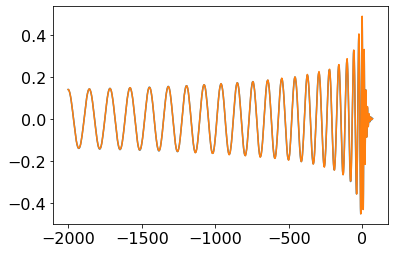

In [103]:
plt.plot(test_input[:,0], y_val_scaled[-1])
plt.plot(test_input[:,0], test_yhat[:,0], ls='-')
# plt.xlim(0.3, 0.5)
# plt.yscale('log')

(-500.0, 100.0)

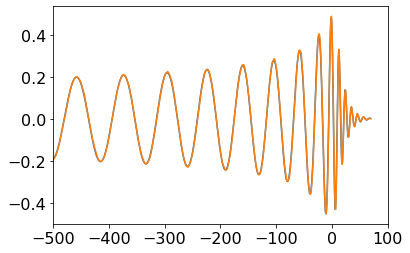

In [104]:
plt.plot(test_input[:,0], y_val_scaled[-1])
plt.plot(test_input[:,0], test_yhat[:,0], ls='-')
plt.xlim(-500, 100)
# plt.yscale('log')

In [105]:
X_val.shape

(414000, 5)

In [106]:
theta_val.shape

(100, 4)

In [107]:
times_val_scaled.shape

(4140, 1)

In [108]:
# yhat_val = model.predict([X_validation[:,0], X_validation[:,1:]], verbose=0)
yhat_val = model([X_val[:,0], X_val[:,1:]])

# this is: (num waveforms, num time samples)
shape_ = (theta_val.shape[0], times_val_scaled.shape[0])
print(shape_)

# yhat_val = yhat_val.reshape(shape_)
yhat_val = yhat_val.numpy().reshape(shape_)

(100, 4140)


In [109]:
mse_val = tf.keras.losses.mean_squared_error(y_val_scaled, yhat_val)

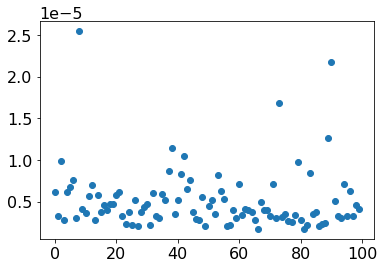

In [110]:
plt.plot(mse_val, 'o')

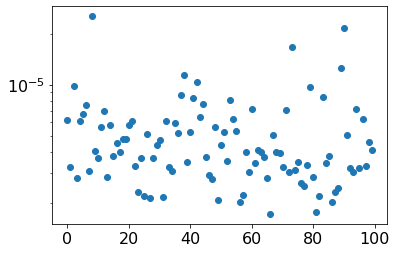

In [111]:
plt.plot(mse_val, 'o')
plt.yscale('log')

In [112]:
mse_val.shape

TensorShape([100])

In [113]:
print(mse_val.numpy().min())
print(mse_val.numpy().max())
print(mse_val.numpy().mean())
print(np.median(mse_val.numpy()))

1.7192572e-06
2.5440453e-05
5.125885e-06
3.989857e-06


Text(0, 0.5, 'spin1x')

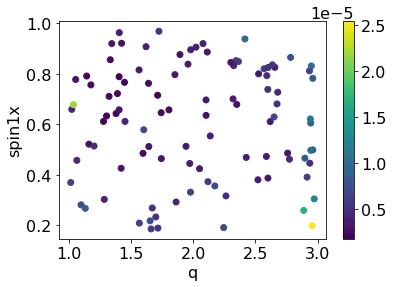

In [114]:
plt.scatter(theta_val[:,0], theta_val[:,1], c=mse_val)
plt.colorbar()
plt.xlabel('q')
plt.ylabel('spin1x')

Text(0, 0.5, 'spin1z')

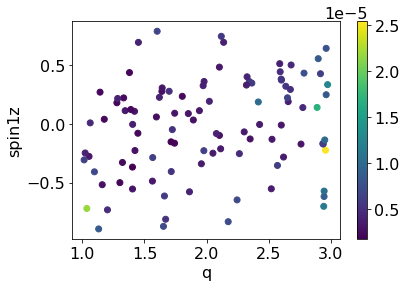

In [115]:
plt.scatter(theta_val[:,0], theta_val[:,3], c=mse_val)
plt.colorbar()
plt.xlabel('q')
plt.ylabel('spin1z')

Text(0, 0.5, 'spin1z')

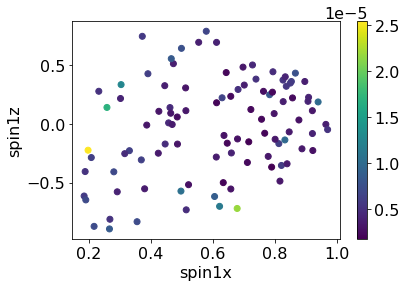

In [116]:
plt.scatter(theta_val[:,1], theta_val[:,3], c=mse_val)
plt.colorbar()
plt.xlabel('spin1x')
plt.ylabel('spin1z')

In [117]:
worst_idx = np.argmax(mse_val)
worst_idx


8

In [118]:
theta_val[worst_idx]

array([ 2.95578349,  0.19756437,  0.        , -0.22495277])

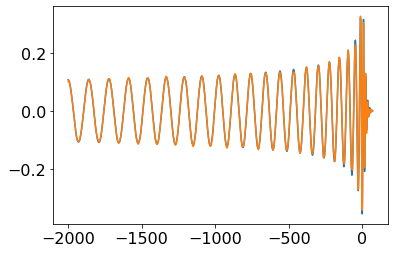

In [119]:
plt.figure()
plt.plot(times_val, y_val_scaled[worst_idx])
plt.plot(times_val, yhat_val[worst_idx])
# plt.xlim(-100, 120)

(-500.0, 120.0)

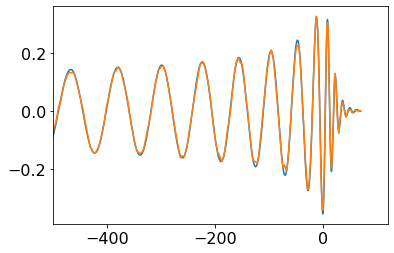

In [120]:
plt.figure()
plt.plot(times_val, y_val_scaled[worst_idx])
plt.plot(times_val, yhat_val[worst_idx])
plt.xlim(-500, 120)

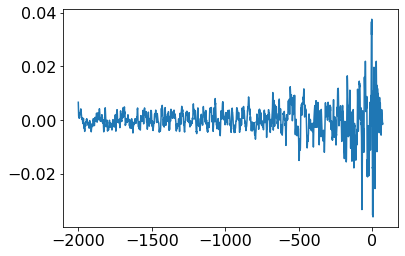

In [121]:
plt.figure()
plt.plot(times_val, y_val_scaled[worst_idx]-yhat_val[worst_idx])
# plt.xlim(-100, 120)

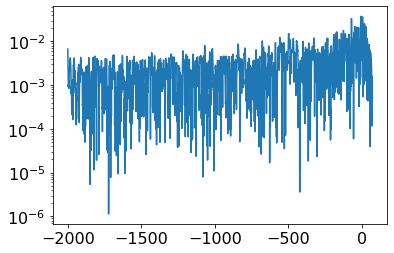

In [122]:
plt.figure()
plt.plot(times_val, np.abs(y_val_scaled[worst_idx]-yhat_val[worst_idx]))
# plt.xlim(-100, 120)
plt.yscale('log')